<a href="https://colab.research.google.com/github/anidaniel/proj-acnologia/blob/master/Acnologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install TFANN

  Created wheel for TFANN: filename=TFANN-1.0.1-cp36-none-any.whl size=7539 sha256=b831792db478a9a8ba16f88c747366949d80d497180ce48a4c29a058fc9aa35a
  Stored in directory: /root/.cache/pip/wheels/3b/38/aa/a57c9b8bdeccf63d4a14ced9ab09a1b4cc4cb3b48fadecf906
Successfully built TFANN


In [0]:
import numpy as np
import matplotlib.pyplot as mpl
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.preprocessing import scale
from TFANN import ANNR
from google.colab import files

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
files.upload()

Saving aapl_5y.csv to aapl_5y.csv


{'aapl_5y.csv': b'Date,Date Value,Open,High,Low,Close,Adj Close,Volume\n11/3/2014,41946,108.220001,110.300003,108.010002,109.400002,100.385109,52282600\n11/4/2014,41947,109.360001,109.489998,107.720001,108.599998,99.651047,41574400\n11/5/2014,41948,109.099998,109.300003,108.129997,108.860001,99.889618,37435900\n11/6/2014,41949,108.599998,108.790001,107.800003,108.699997,100.175293,34968500\n11/7/2014,41950,108.75,109.32,108.550003,109.010002,100.460983,33691500\n11/10/2014,41953,109.019997,109.330002,108.669998,108.830002,100.295105,27195500\n11/11/2014,41954,108.699997,109.75,108.400002,109.699997,101.09687,27442300\n11/12/2014,41955,109.379997,111.43,109.370003,111.25,102.525322,46942400\n11/13/2014,41956,111.800003,113.449997,111.599998,112.82,103.972198,59522900\n11/14/2014,41957,113.150002,114.190002,111.209999,114.18,105.22554,44063600\n11/17/2014,41960,114.269997,117.279999,113.300003,113.989998,105.05043,46746700\n11/18/2014,41961,113.940002,115.690002,113.889999,115.470001,106

In [0]:
!ls

aapl_5y.csv  appleStock.csv  sample_data


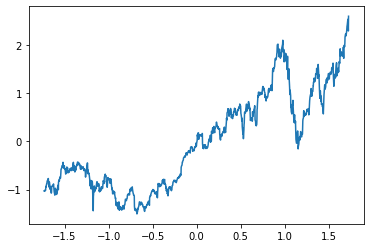

In [0]:
#reads data from the file and creates a matrix with only dates and the prices
stock_data = np.loadtxt('aapl_5y.csv',delimiter=",",skiprows=1,usecols=(1, 4))
#scales the data to smaller values
stock_data = scale(stock_data)
#gets the price and dates from the matrix
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)
#creates a plot of the data and then displays it
mpl.plot(dates[:, 0], prices[:, 0])
mpl.show()

In [0]:
#Number of neurons in the input, output, and the hidden layers
input = 1
output = 1
hidden = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params
mlpr = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)

In [0]:
#number of days for the hold-out period used to access progress
holdDays = 5
totalDays = len(dates)
#fit the model to the data "Learning"
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      3.00212293 (Batch Size:   256)
Iter     2	      2.68157516 (Batch Size:   256)
Iter     3	      2.56226783 (Batch Size:   256)
Iter     4	      2.37272248 (Batch Size:   256)
Iter     5	      2.27979321 (Batch Size:   256)
Iter     6	      1.84801576 (Batch Size:   256)
Iter     7	      1.87285891 (Batch Size:   256)
Iter     8	      1.65892868 (Batch Size:   256)
Iter     9	      1.45129278 (Batch Size:   256)
Iter    10	      1.40210495 (Batch Size:   256)
Iter    11	      1.33156700 (Batch Size:   256)
Iter    12	      1.12974496 (Batch Size:   256)
Iter    13	      1.02435712 (Batch Size:   256)
Iter    14	      0.93275244 (Batch Size:   256)
Iter    15	      0.85042471 (Batch Size:   256)
Iter    16	      0.80753249 (Batch Size:   256)
Iter    17	      0.69335011 (Batch Size:   256)
Iter    18	      0.68296790 (Batch Size:   256)
Iter    19	      0.55228915 (Batch Size:   256)
Iter    20	      0.53398393 (Batch Size:   256)
Iter    21	      0.51329454 (Batch Size:

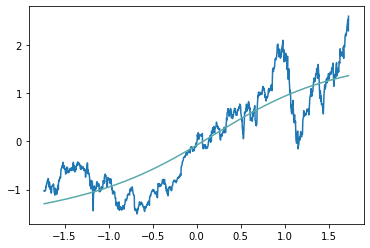

In [0]:
#Predict the stock price using the model
pricePredict = mlpr.predict(dates)
#Display the predicted reuslts agains the actual data
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.show()

In [0]:
#Number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 10000, tol = 0.1, reg = 1e-4, verbose = True)

In [0]:
holdDays = 5
totalDays = len(dates)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      1.15702059 (Batch Size:   256)
Iter     2	      1.02205244 (Batch Size:   256)
Iter     3	      0.95343988 (Batch Size:   256)
Iter     4	      0.83315569 (Batch Size:   256)
Iter     5	      0.78306139 (Batch Size:   256)
Iter     6	      0.67706172 (Batch Size:   256)
Iter     7	      0.62381231 (Batch Size:   256)
Iter     8	      0.54658563 (Batch Size:   256)
Iter     9	      0.49347942 (Batch Size:   256)
Iter    10	      0.45752630 (Batch Size:   256)
Iter    11	      0.39861845 (Batch Size:   256)
Iter    12	      0.37565642 (Batch Size:   256)
Iter    13	      0.32574698 (Batch Size:   256)
Iter    14	      0.33991457 (Batch Size:   256)
Iter    15	      0.32122141 (Batch Size:   256)
Iter    16	      0.29618402 (Batch Size:   256)
Iter    17	      0.31002781 (Batch Size:   256)
Iter    18	      0.28280049 (Batch Size:   256)
Iter    19	      0.29476693 (Batch Size:   256)
Iter    20	      0.28192355 (Batch Size:   256)
Iter    21	      0.26300462 (Batch Size:

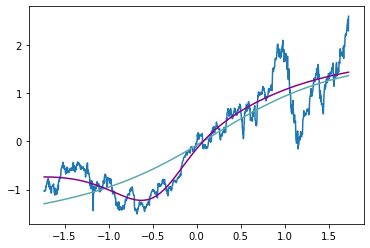

In [0]:
pricePredict2 = mlpr2.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.show()